In [1]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
import numpy as np

/home/swimchoi/anaconda3/envs/analysis/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
df = pd.read_csv('../data/country_and_group.csv', sep='\t')
df = df.iloc[:, 1:]

### whole

In [15]:
color1 = np.random.rand(1)
color2 = np.random.rand(1)
color3 = np.random.rand(1)
color4 = np.random.rand(1)

print('color1:', color1)
print('color2:', color2)
print('color3:', color3)
print('color4:', color4)

color1: [0.88936407]
color2: [0.65030893]
color3: [0.68569225]
color4: [0.02977039]


In [16]:
value_set = ['Ach', 'Ben', 'Con', 'Hed', 'Pow', 'Sec', 'SD', 'Sti', 'Tra', 'Uni']
higher_group = ['Openness_to_Change', 'Self-Enhancement', 'Conservation', 'Self-Transcendence']

In [18]:
df['colors'] = df['Country'].apply(lambda x: color1 if 'Group' in x else (color2 if x in value_set else (color3 if x in higher_group else color4)))
countries = df['Country']

In [19]:
countries = df['Country']
df

,Country,Achievement,Benevolence,Conformity,Hedonism,Power,Security,Self-direction,Stimulation,Tradition,Universalism,colors
0,Albania,4.65,5.23,4.56,4.52,3.89,5.15,4.69,3.76,4.91,5.00,[0.029770394900985542]
1,Belgium,3.95,5.11,4.16,4.41,3.37,4.60,4.64,3.74,4.48,4.88,[0.029770394900985542]
2,Bulgaria,4.66,5.08,4.59,3.66,3.74,5.17,4.28,3.60,4.71,4.86,[0.029770394900985542]
3,Cyprus,4.24,5.35,4.11,4.20,3.65,5.56,5.02,3.77,4.93,5.14,[0.029770394900985542]
4,Czech,3.87,4.54,4.26,3.94,3.86,4.76,4.55,3.53,4.21,4.48,[0.029770394900985542]
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Uni,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,6.00,[0.6503089270947374]
138,Openness_to_Change,1.00,1.00,1.00,1.00,1.00,1.00,6.00,6.00,1.00,1.00,[0.6856922497499972]
139,Self-Enhancement,6.00,1.00,1.00,6.00,6.00,1.00,1.00,1.00,1.00,1.00,[0.6856922497499972]
140,Conservation,1.00,1.00,6.00,1.00,1.00,6.00,1.00,1.00,6.00,1.00,[0.6856922497499972]


In [27]:
reducer = umap.UMAP(init='spectral', random_state=15)
%time embedding = reducer.fit_transform(df.iloc[:, 1:])

/home/swimchoi/anaconda3/envs/analysis/lib/python3.12/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 5.24 s, sys: 92.9 ms, total: 5.33 s
Wall time: 1.86 s


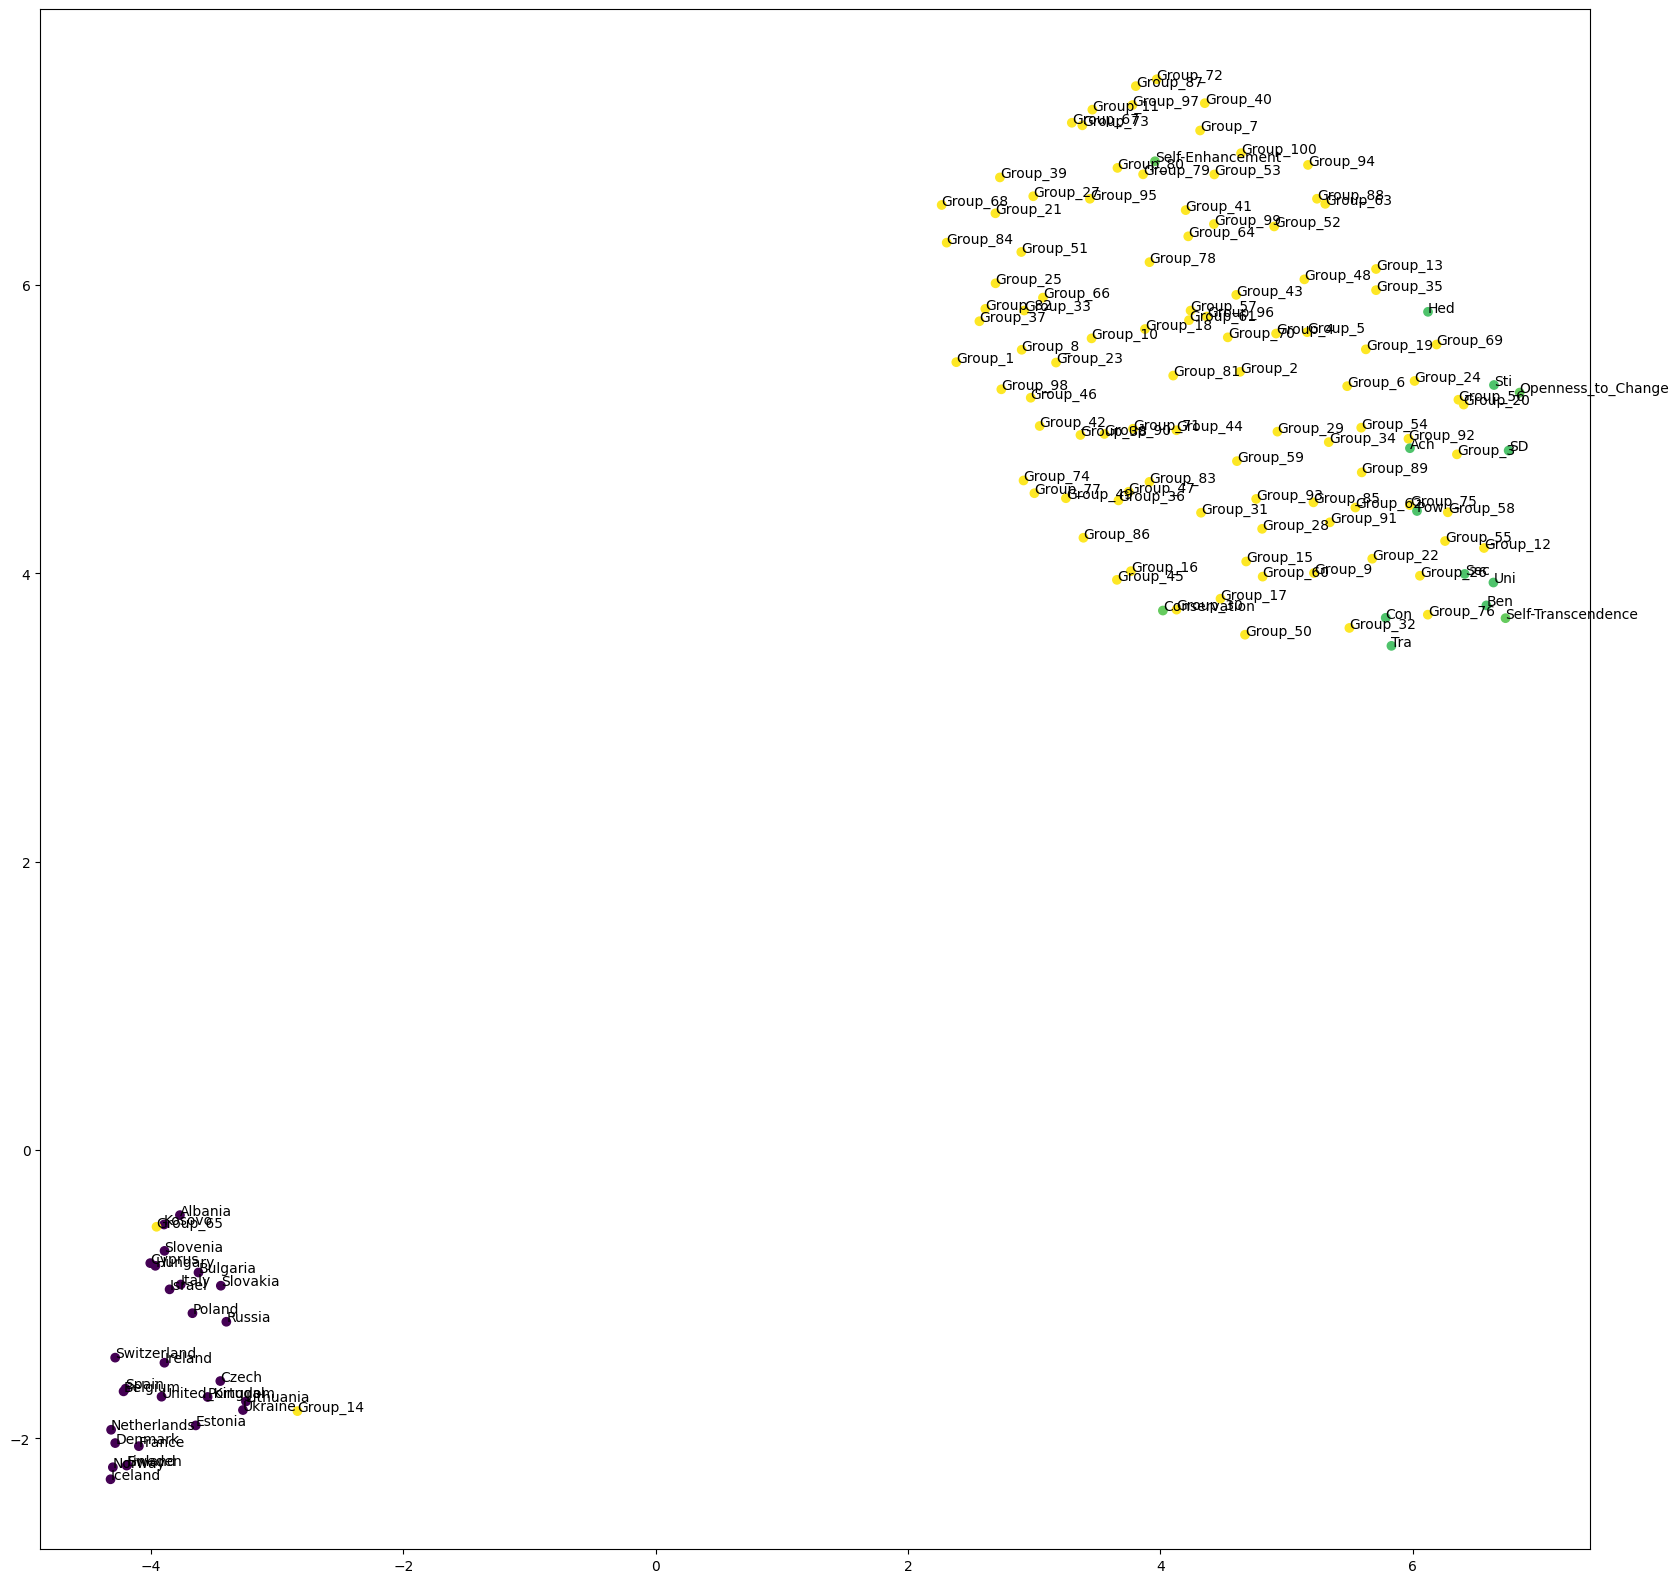

In [28]:
plt.figure(figsize=(20, 20))
plt.scatter(embedding[:, 0], embedding[:, 1], c=df['colors'])
for i, txt in enumerate(countries):
    plt.text(embedding[i, 0], embedding[i, 1], txt)
plt.show()

### highest country and lowest copuntry

In [7]:
top = ['Estonia', 'Poland', 'Bulgaria', 'Slovakia', 'Ukraine', 'Kosovo']
bottom = ['Iceland', 'France', 'Sweden', 'Lithuania']

In [8]:
top_df = df[df['Country'].isin(top)].copy()
top_df['color'] = np.random.rand(len(top_df))
top_df

,Country,Achievement,Benevolence,Conformity,Hedonism,Power,Security,Self-direction,Stimulation,Tradition,Universalism,colors,color
2,Bulgaria,4.66,5.08,4.59,3.66,3.74,5.17,4.28,3.60,4.71,4.86,[0.16105812919517304],0.377504
6,Estonia,3.08,4.73,4.11,3.63,3.32,4.72,3.46,3.70,4.79,4.39,[0.16105812919517304],0.713064
14,Kosovo,5.20,5.48,4.94,4.06,4.41,5.53,5.09,4.17,5.22,5.27,[0.16105812919517304],0.861175
18,Poland,4.14,4.96,4.67,3.41,3.76,5.05,4.59,3.61,4.65,4.98,[0.16105812919517304],0.389806
21,Slovakia,4.29,4.75,4.67,3.76,4.05,5.11,4.75,3.71,4.68,4.83,[0.16105812919517304],0.116735
26,Ukraine,3.87,4.52,4.17,3.49,3.94,4.75,4.11,3.41,4.09,4.48,[0.16105812919517304],0.113553


In [9]:
bottom_df = df[df['Country'].isin(bottom)].copy()
bottom_df['color'] = np.random.rand(len(bottom_df))
bottom_df

,Country,Achievement,Benevolence,Conformity,Hedonism,Power,Security,Self-direction,Stimulation,Tradition,Universalism,colors,color
8,France,3.32,4.89,3.69,4.28,2.78,4.54,4.42,3.40,4.12,4.85,[0.16105812919517304],0.634383
10,Iceland,3.30,5.21,3.54,4.29,3.05,4.22,4.55,3.74,3.93,4.81,[0.16105812919517304],0.983632
15,Lithuania,4.07,4.13,3.71,3.61,3.97,4.66,4.18,3.44,3.98,4.13,[0.16105812919517304],0.731338
24,Sweden,3.46,5.12,3.88,4.26,3.21,4.12,4.72,3.64,4.13,4.90,[0.16105812919517304],0.849251


In [ ]:
concat = pd.concat([top_df, bottom_df])

In [ ]:
reducer = umap.UMAP()
%time embedding = reducer.fit_transform(concat.iloc[:, 1:])

/home/swimchoi/anaconda3/envs/analysis/lib/python3.12/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


CPU times: user 8min 58s, sys: 670 ms, total: 8min 59s
Wall time: 9.59 s


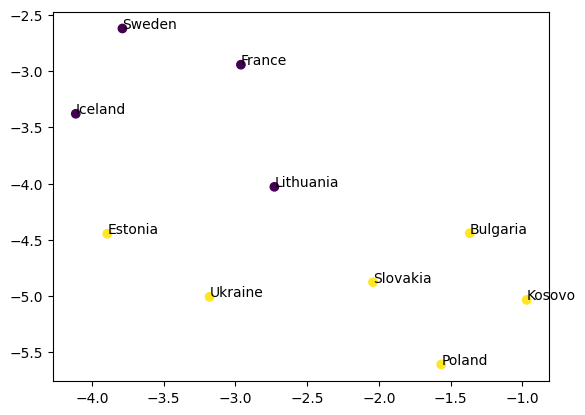

In [ ]:
countries = concat['Country']

plt.scatter(embedding[:, 0], embedding[:, 1], c=concat['color'])
for i, name in enumerate(countries):
    plt.text(embedding[i, 0], embedding[i, 1], name)
plt.show()

### European Countries

In [14]:
color1 = np.random.rand(1)
color2 = np.random.rand(1)
color3 = np.random.rand(1)

In [15]:
top = ['Estonia', 'Poland', 'Bulgaria', 'Slovakia', 'Ukraine', 'Kosovo']
bottom = ['Iceland', 'France', 'Sweden', 'Lithuania']

In [10]:
other_df = df[~df['Country'].isin(top+bottom)].copy()
other_df['color'] = np.random.rand(len(other_df))
other_df

,Country,Achievement,Benevolence,Conformity,Hedonism,Power,Security,Self-direction,Stimulation,Tradition,Universalism,colors,color
0,Albania,4.650000,5.230000,4.560000,4.520000,3.890000,5.150000,4.690000,3.760000,4.910000,5.000000,[0.16105812919517304],0.311440
1,Belgium,3.950000,5.110000,4.160000,4.410000,3.370000,4.600000,4.640000,3.740000,4.480000,4.880000,[0.16105812919517304],0.597995
3,Cyprus,4.240000,5.350000,4.110000,4.200000,3.650000,5.560000,5.020000,3.770000,4.930000,5.140000,[0.16105812919517304],0.782337
4,Czech,3.870000,4.540000,4.260000,3.940000,3.860000,4.760000,4.550000,3.530000,4.210000,4.480000,[0.16105812919517304],0.012426
5,Denmark,3.770000,5.230000,4.250000,4.440000,3.320000,4.170000,4.750000,3.790000,3.980000,4.830000,[0.16105812919517304],0.393483
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Group_96,4.009516,1.779412,3.349481,2.859862,3.233564,1.771626,2.012976,4.112457,2.059689,1.905133,[0.192203954203503],0.220882
124,Group_97,5.027228,1.394802,1.581683,4.987624,5.150990,1.485149,2.597772,5.019802,1.464109,1.557343,[0.192203954203503],0.597745
125,Group_98,3.254237,2.973635,2.687382,4.015066,2.921846,2.775895,2.977401,3.174200,3.406780,2.835217,[0.192203954203503],0.515381
126,Group_99,4.582150,1.340771,1.612576,2.565923,4.417850,1.470588,1.821501,4.159229,1.574037,1.474307,[0.192203954203503],0.867049


In [31]:
country = pd.concat([top_df, bottom_df, other_df])
country = country.loc[:27, :]
country

,Country,Achievement,Benevolence,Conformity,Hedonism,Power,Security,Self-direction,Stimulation,Tradition,Universalism,colors,color
2,Bulgaria,4.66,5.08,4.59,3.66,3.74,5.17,4.28,3.60,4.71,4.86,[0.5114448156847234],[0.5136323092489574]
6,Estonia,3.08,4.73,4.11,3.63,3.32,4.72,3.46,3.70,4.79,4.39,[0.5114448156847234],[0.5136323092489574]
14,Kosovo,5.20,5.48,4.94,4.06,4.41,5.53,5.09,4.17,5.22,5.27,[0.5114448156847234],[0.5136323092489574]
18,Poland,4.14,4.96,4.67,3.41,3.76,5.05,4.59,3.61,4.65,4.98,[0.5114448156847234],[0.5136323092489574]
21,Slovakia,4.29,4.75,4.67,3.76,4.05,5.11,4.75,3.71,4.68,4.83,[0.5114448156847234],[0.5136323092489574]
26,Ukraine,3.87,4.52,4.17,3.49,3.94,4.75,4.11,3.41,4.09,4.48,[0.5114448156847234],[0.5136323092489574]
8,France,3.32,4.89,3.69,4.28,2.78,4.54,4.42,3.40,4.12,4.85,[0.5114448156847234],[0.47139267510081884]
10,Iceland,3.30,5.21,3.54,4.29,3.05,4.22,4.55,3.74,3.93,4.81,[0.5114448156847234],[0.47139267510081884]
15,Lithuania,4.07,4.13,3.71,3.61,3.97,4.66,4.18,3.44,3.98,4.13,[0.5114448156847234],[0.47139267510081884]
24,Sweden,3.46,5.12,3.88,4.26,3.21,4.12,4.72,3.64,4.13,4.90,[0.5114448156847234],[0.47139267510081884]


In [32]:
reducer = umap.UMAP()
%time embedding = reducer.fit_transform(country.iloc[:, 1:])

CPU times: user 6min 39s, sys: 285 ms, total: 6min 39s
Wall time: 7.91 s


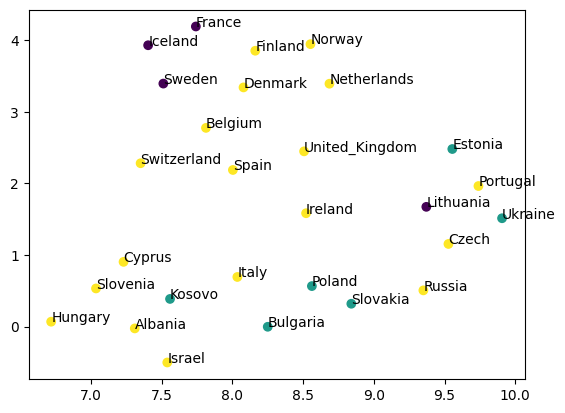

In [33]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=country['color'])
for i, name in enumerate(country['Country']):
    plt.text(embedding[i, 0], embedding[i, 1], name)
plt.show()